In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_openml

In [39]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True) # getting data from online
print('X shape:', X.shape, 'y shape:', y.shape)

X shape: (70000, 784) y shape: (70000,)


In [40]:
X = X.values
digits = {j:[] for j in range(10)}
for j in range(len(y)): # takes data assigns it into a dictionary
    digits[int(y[j])].append(X[j].reshape(28,28))
digits = {j:np.stack(digits[j]) for j in range(10)} # stack everything to be one numpy array
for j in range(10):
    print('Shape of data with label', j, ':', digits[j].shape )

Shape of data with label 0 : (6903, 28, 28)
Shape of data with label 1 : (7877, 28, 28)
Shape of data with label 2 : (6990, 28, 28)
Shape of data with label 3 : (7141, 28, 28)
Shape of data with label 4 : (6824, 28, 28)
Shape of data with label 5 : (6313, 28, 28)
Shape of data with label 6 : (6876, 28, 28)
Shape of data with label 7 : (7293, 28, 28)
Shape of data with label 8 : (6825, 28, 28)
Shape of data with label 9 : (6958, 28, 28)


In [43]:
data = []
for i in range(10):
    flattened_images = digits[i][:100].reshape(100,-1)
    data.append(flattened_images)
    
data = np.vstack(data)
data = data.astype('float32') / 255.0

Index of  0  is  2465
Index of  1  is  2572
Index of  2  is  3421
Index of  3  is  2926
Index of  4  is  77
Index of  5  is  5930
Index of  6  is  958
Index of  7  is  5956
Index of  8  is  4969
Index of  9  is  4876


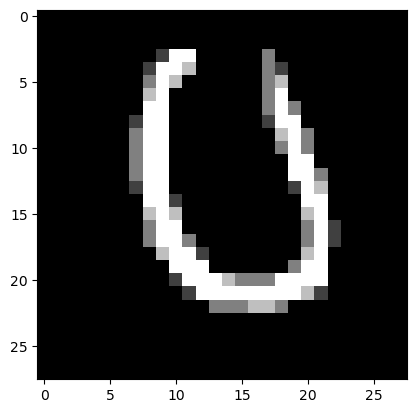

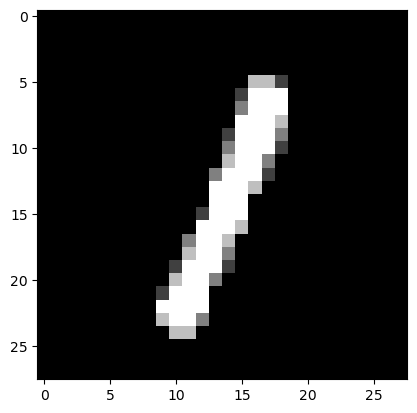

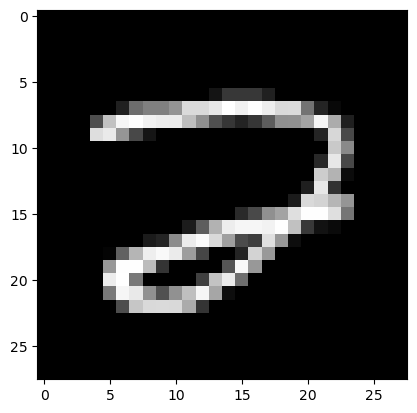

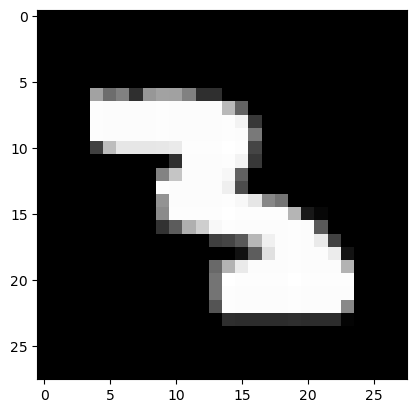

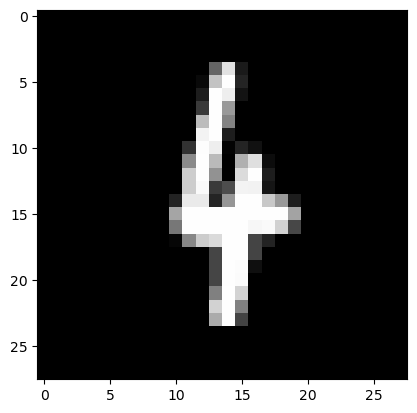

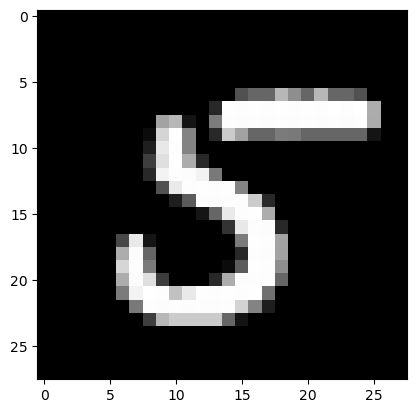

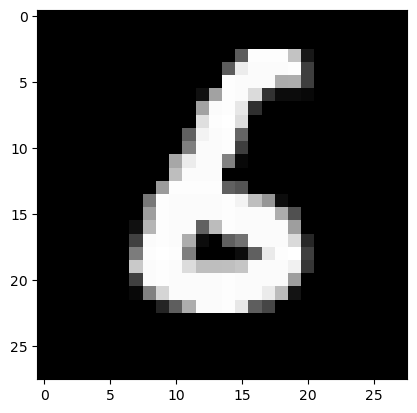

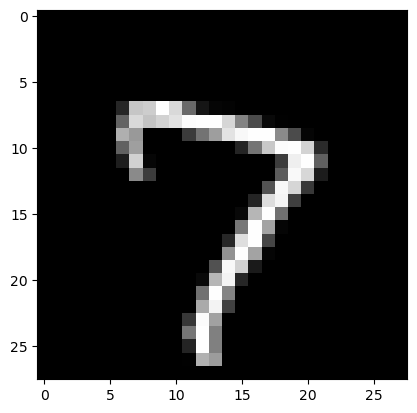

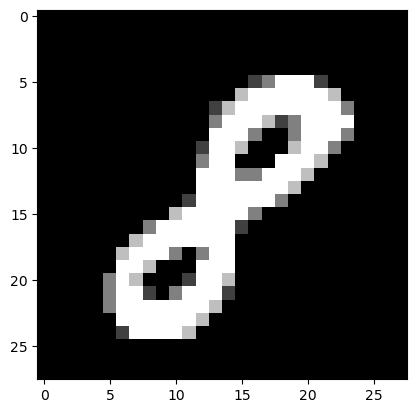

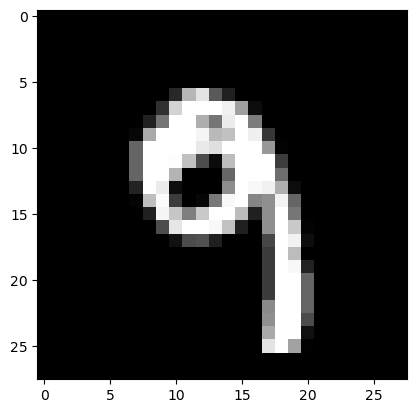

In [50]:
for i in range(10): #Problem 4A
    random_index = np.random.randint(len(digits[i]))
    plt.figure()
    plt.imshow(digits[i][random_index],cmap='gray')
    print("Index of ", i,  " is ", random_index)

In [163]:
data_0 = digits[0][:500]
data_1 = digits[1][:500]

In [164]:
data_0 = data_0.reshape(500, 784) / 255.0
data_1 = data_1.reshape(500, 784) / 255.0

In [165]:
#4b

X_train = np.vstack((data_0,data_1))
X_train = X_train.reshape(1000, 784)
y_train = np.array([-1]*500 + [1]*500)

In [166]:
#4c

w = np.random.randn(784) * 0.001
loss_history = []
num_iterations = 10000;
for t in range(num_iterations):

    predictions = X_train.dot(w)  
    
    errors = predictions - y_train  
    
    sum_squared_errors = np.sum(errors ** 2)
    loss = sum_squared_errors / len(y_train)
    loss_history.append(loss)
    
    grad = (2.0 / len(y_train)) * X_train.T.dot(errors) 

    w = w - 0.0001 * grad
    

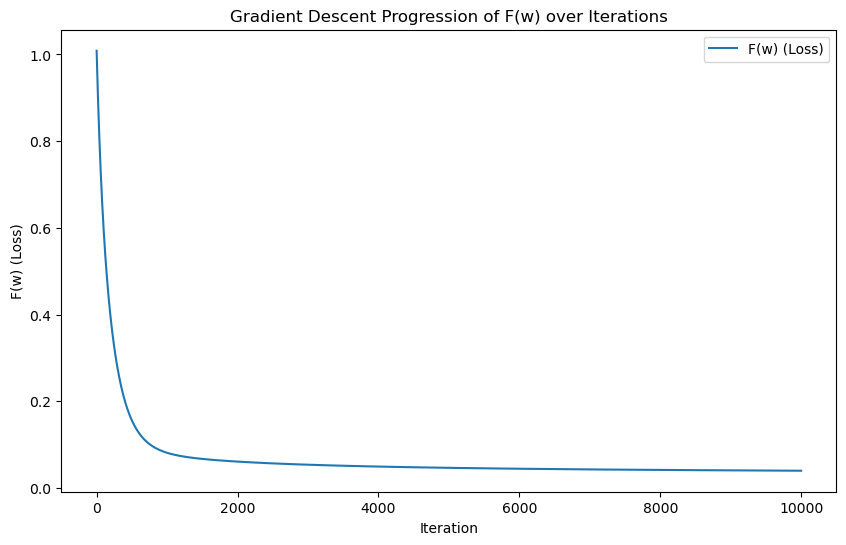

In [167]:
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), loss_history, label="F(w) (Loss)")
plt.xlabel("Iteration")
plt.ylabel("F(w) (Loss)")
plt.title("Gradient Descent Progression of F(w) over Iterations")
plt.legend()
plt.show()

In [168]:
"""4d
The resulting plot shows that we have successfully reached a local minimum, but not necessarily a global minimum. 
Given that the graph converges fairly quickly, we can see that we chose a good stopping criteria, and could have gotten away
with choosing stopping criteria around 1000 instead of 10000. 
In previous lectures, the stepping size has shown that if we step too far, we can possibly end up stepping over a local minumum
The step size we chose was perfect for the algorithm. I also tested a step size of 1, and the graph quickly showed 
more and more error, so 0.0001 was perfect. Ideally, for efficieny we want a large enough step size, but not too big enough
to step over the local minimum.
"""


'4d\nThe resulting plot shows that we have successfully reached a local minimum, but not necessarily a global minimum. \nGiven that the graph converges fairly quickly, we can see that we chose a good stopping criteria, and could have gotten away\nwith choosing stopping criteria around 1000 instead of 10000. \nIn previous lectures, the stepping size has shown that if we step too far, we can possibly end up stepping over a local minumum\nThe step size we chose was perfect for the algorithm. I also tested a step size of 1, and the graph quickly showed \nmore and more error, so 0.0001 was perfect. Ideally, for efficieny we want a large enough step size, but not too big enough\nto step over the local minimum.\n'

In [169]:
random_indices_0 = np.random.choice(len(digits[0]), 500, replace=False)
random_indices_1 = np.random.choice(len(digits[1]), 500, replace=False)

test_data_0 = digits[0][random_indices_0]
test_data_1 = digits[1][random_indices_1]

test_data_0 = test_data_0.reshape(500, 784) / 255.0
test_data_1 = test_data_1.reshape(500, 784) / 255.0

X_test = np.vstack((test_data_0, test_data_1))
y_test = np.array([-1] * 500 + [1] * 500)


def error_rate(predictions, labels):
    misclassifications = np.sum(predictions != labels)
    return misclassifications / len(labels)

def classify(X, w):
    return np.sign(X.dot(w))

y_test_pred = classify(X_test, w)
test_error_rate = error_rate(y_test_pred, y_test)

y_train_pred = classify(X_train, w)
train_error_rate = error_rate(y_train_pred, y_train)

print("Test Error Rate:", test_error_rate)
print("Training Error Rate:", train_error_rate)

Test Error Rate: 0.002
Training Error Rate: 0.001


In [170]:
"""
The error rate on the training data and the error rate on the testing data make sense. The test data
is data that the function has never seen before, while the training data is what the function is built on.
The training data will have a lower error rate
"""

'\nThe error rate on the training data and the error rate on the testing data make sense. The test data\nis data that the function has never seen before, while the training data is what the function is built on\n'